In [ ]:
# pip install plotly
# !pip install "numpy<2.0" --user

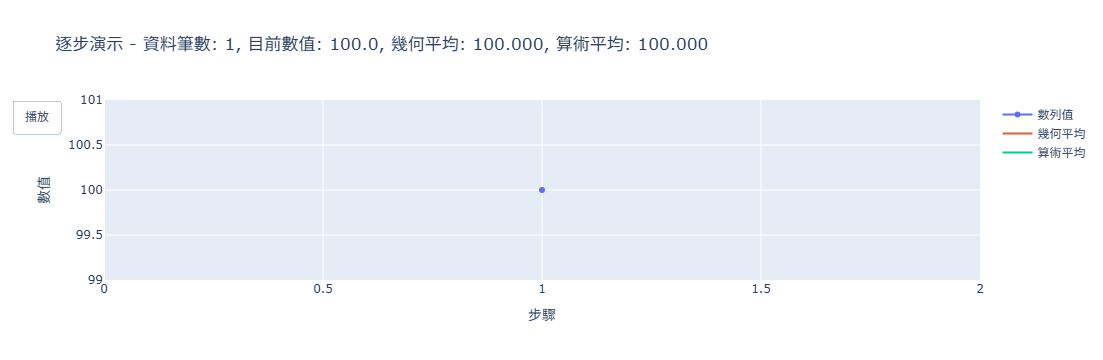

In [11]:
import numpy as np
import plotly.graph_objects as go
from scipy import stats
import pandas as pd

np.random.seed(40)


# 初始值
a = 100.0
steps = 50

# 用來存放數列值、幾何平均、算術平均
values = [a]
geomeans = [a]
arithmeans = [a]
r_list = []

# 逐步生成隨機比例 r 並更新數列
for i in range(2, steps + 1):
    r = np.random.uniform(0.1, 2.1)   # 每一步隨機比例 (正數範圍)
    values.append(values[-1] * r)
    geomeans.append(np.prod(values) ** (1/i))       # 幾何平均
    arithmeans.append(np.mean(values))              # 算術平均
    r_list.append(r)
    
# 建立動畫幀
frames = []
for i in range(1, steps+1):
    frames.append(go.Frame(
        data=[
            go.Scatter(x=list(range(1, i+1)), y=values[:i], mode="markers+lines", name="數列值"),
            go.Scatter(x=list(range(1, i+1)), y=[geomeans[i-1]]*i, mode="lines", name="幾何平均"),
            go.Scatter(x=list(range(1, i+1)), y=[arithmeans[i-1]]*i, mode="lines", name="算術平均")
        ],
        layout=go.Layout(
            title=f"逐步演示 - 資料筆數: {i}, 目前數值: {values[i-1]:.3f}, 幾何平均: {geomeans[i-1]:.3f}, 算術平均: {arithmeans[i-1]:.3f}"
        ),
        name=f"Step {i}"
    ))

# 初始圖表
fig = go.Figure(
    data=[
        go.Scatter(x=[1], y=[values[0]], mode="markers+lines", name="數列值"),
        go.Scatter(x=[1], y=[geomeans[0]], mode="lines", name="幾何平均"),
        go.Scatter(x=[1], y=[arithmeans[0]], mode="lines", name="算術平均")
    ],
    layout=go.Layout(
        title=f"逐步演示 - 資料筆數: 1, 目前數值: {values[0]}, 幾何平均: {geomeans[0]:.3f}, 算術平均: {arithmeans[0]:.3f}",
        xaxis=dict(title="步驟"),
        yaxis=dict(title="數值"),
        updatemenus=[dict(type="buttons", showactive=False,
                          buttons=[dict(label="播放",
                                        method="animate",
                                        args=[None, {"frame": {"duration": 1000, "redraw": True},
                                                     "fromcurrent": True}])])]
    ),
    frames=frames
)

fig.show()